In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# warning메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프에서 한글 깨짐 방지
import platform
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')



In [206]:
df=pd.read_csv('',index_col=0)

In [207]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler=MinMaxScaler()
scaler2=StandardScaler()

df['총자산규모(Size)']=scaler.fit_transform(df['총자산규모(Size)'].values.reshape(-1,1))
#df['총자산규모(Size)']=np.log(df['총자산규모(Size)'])
df['부채비율(DEB)']=(df['부채비율(DEB)'])/100
df['자기자본비율(DEB)']= (df['자기자본비율(DEB)'])/100
df['매출액증가율']= (df['매출액증가율'])/100



In [208]:
X=df[['총자산규모(Size)','부채비율(DEB)','자기자본비율(DEB)','매출액증가율','현금흐름(CF)','PBR']]
y=df['배당지급(DV)']

In [209]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np


X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=0)
lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds=lr.predict(X_test)
mse= mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,y_preds):.3f}")

MSE : 13854310398789224.000, RMSE:117704334.664
Variance score:0.492


In [210]:
X=df[['총자산규모(Size)','부채비율(DEB)','자기자본비율(DEB)','매출액증가율','현금흐름(CF)','PBR','ESG','E','S','G']]
y=df['배당지급(DV)']


X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=0)
lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds=lr.predict(X_test)
mse= mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,y_preds):.3f}")

MSE : 13845095239101882.000, RMSE:117665182.782
Variance score:0.492


## randomfroestregressor

In [213]:
from sklearn.ensemble import RandomForestRegressor
rf_reg= RandomForestRegressor(max_depth= 12, min_samples_leaf= 8, min_samples_split= 8, n_estimators= 100)
rf_reg.fit(X_train,y_train)
y_preds=rf_reg.predict(X_test)
mse= mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,y_preds):.3f}")

MSE : 12408638492346758.000, RMSE:111394068.479
Variance score:0.545


In [204]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestRegressor(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.4192


## ridge

In [197]:
from sklearn.linear_model import Ridge
Ridge= Ridge(alpha=0.001)
Ridge.fit(X_train,y_train)
y_preds=Ridge.predict(X_test)
mse= mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,y_preds):.3f}")

MSE : 13846233106612266.000, RMSE:117670017.875
Variance score:0.492


## xgboost

In [200]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
 
XGBR= XGBRegressor(random_state=0)
XGBR.fit(X_train, y_train)
y_pred=XGBR.predict(X_test)
mse= mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,y_preds):.3f}")

MSE : 13846233106612266.000, RMSE:117670017.875
Variance score:0.492


In [166]:
117670017.875-117665182.782

4835.092999994755

1. EDA

In [132]:
## 데이터의 타입 확인 및 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3190 entries, CS홀딩스 to 흥아해운
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   업종명          3190 non-null   object 
 1   평가연도         3190 non-null   int64  
 2   총자산규모(Size)  3190 non-null   float64
 3   부채비율(DEB)    3190 non-null   float64
 4   자기자본비율(DEB)  3190 non-null   float64
 5   매출액증가율       3190 non-null   float64
 6   현금흐름(CF)     3190 non-null   float64
 7   PBR          3190 non-null   float64
 8   ESG          3190 non-null   float64
 9   E            3190 non-null   float64
 10  S            3190 non-null   float64
 11  G            3190 non-null   float64
 12  배당지급(DV)     3190 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 477.9+ KB


In [133]:
df.isna().sum()

업종명            0
평가연도           0
총자산규모(Size)    0
부채비율(DEB)      0
자기자본비율(DEB)    0
매출액증가율         0
현금흐름(CF)       0
PBR            0
ESG            0
E              0
S              0
G              0
배당지급(DV)       0
dtype: int64

In [134]:
## 종속변수 분포 확

print("배당평균 :", df["배당지급(DV)"].mean())

배당평균 : 16839672.10031348


<Axes: >

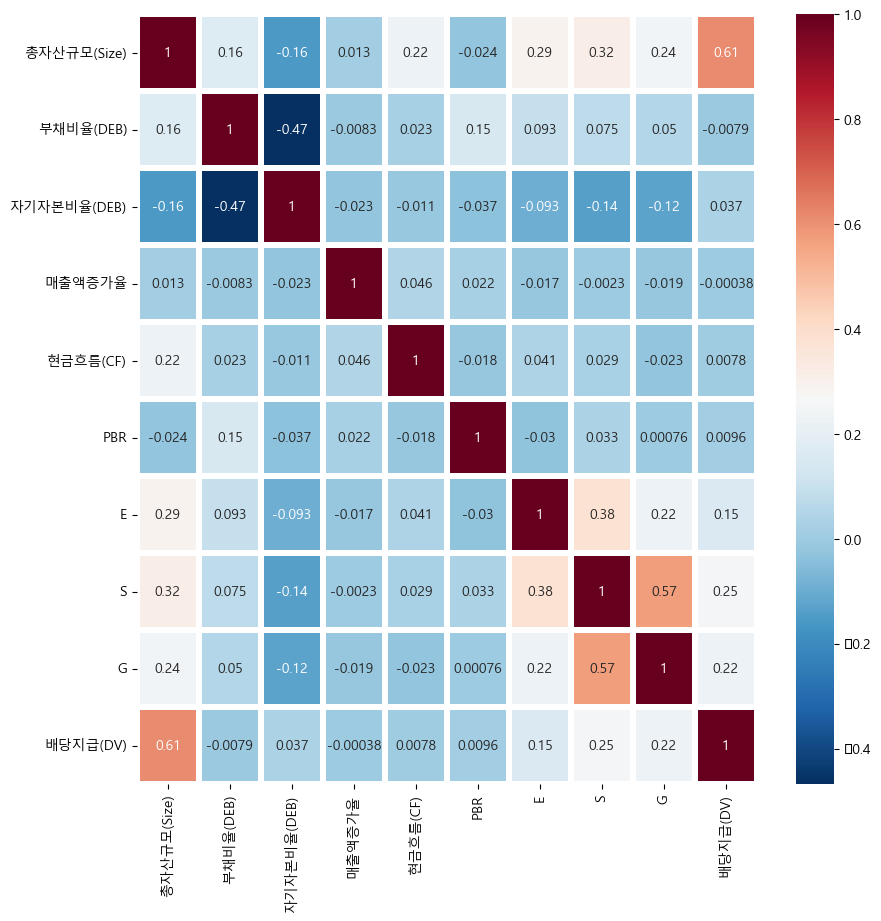

In [136]:
# 독립 변수 EDA
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
df_cor = df[['총자산규모(Size)','부채비율(DEB)','자기자본비율(DEB)','매출액증가율','현금흐름(CF)','PBR','ESG','E','S','G','배당지급(DV)']].corr(method='pearson')
sns.heatmap(df_cor,
           xticklabels = df_cor.columns,
           yticklabels = df_cor.columns,
           cmap='RdBu_r',
           annot=True, 
           linewidth=3)